In [ ]:
# Practical 1 : Performing matrix multiplication and finding eigen vectors and eigen values using TensorFlow

In [ ]:
# importing numpy library
import numpy as np

# create numpy 2d-array
m = np.array([[1, 2],
			[2, 3]])

print("Printing the Original square array:\n",m)
print()
print('***************************************')
print()
# finding eigenvalues and eigenvectors
w, v = np.linalg.eig(m)

# printing eigen values
print("Printing the Eigen values of the given square array:\n",w)
print()
# printing eigen vectors
print("Printing Right Eigen Vectors of the given square array:\n",v)

Printing the Original square array:
 [[1 2]
 [2 3]]

***************************************

Printing the Eigen values of the given square array:
 [-0.23606798  4.23606798]

Printing Right Eigen Vectors of the given square array:
 [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [ ]:
import tensorflow as tf


# Let's see how we can compute the eigen vectors and values from a matrix

e_matrix_A = tf.random.uniform([2, 2], minval=3, maxval=10, dtype=tf.float32, name="matrixA")

print("Matrix A: \n{}\n\n".format(e_matrix_A))

# Calculating the eigen values and vectors using tf.linalg.eigh, if you only want the values you can use eigvalsh

eigen_values_A, eigen_vectors_A = tf.linalg.eigh(e_matrix_A)

print("Eigen Vectors: \n{} \n\nEigen Values: \n{}\n".format(eigen_vectors_A, eigen_values_A))

# Let's see how we can compute the eigen vectors and values from a matrix

e_matrix_A = tf.random.uniform([3, 3], minval=3, maxval=10, dtype=tf.float32, name="matrixA")

print("Matrix A: \n{}\n\n".format(e_matrix_A))

eigen_values_A, eigen_vectors_A = tf.linalg.eigh(e_matrix_A)

print("Eigen Vectors: \n{} \n\nEigen Values: \n{}\n".format(eigen_vectors_A, eigen_values_A))

Matrix A: 
[[3.207433  7.6353607]
 [5.1906886 7.804467 ]]


Eigen Vectors: 
[[-0.8381212  -0.54548407]
 [ 0.54548407 -0.8381212 ]] 

Eigen Values: 
[-0.17088264 11.182782  ]

Matrix A: 
[[9.952661  7.0295935 5.6251545]
 [5.4786673 5.358327  8.45569  ]
 [7.756089  4.1407905 7.7573833]]


Eigen Vectors: 
[[-0.71717393 -0.0985206   0.6898951 ]
 [ 0.292283    0.85615784  0.42610383]
 [ 0.63263905 -0.50723517  0.58521813]] 

Eigen Values: 
[ 0.877977   2.2746484 19.915745 ]



In [ ]:
# Practical 2 : Solving XOR problem using deep feed forward network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler


X,Y=make_blobs(n_samples=100,centers=2,n_features=2,random_state=1)


scalar=MinMaxScaler()
scalar.fit(X)
X=scalar.transform(X)


model=Sequential()
model.add(Dense(4,input_dim=2,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.summary()

model.fit(X,Y,epochs=100)   # u can use 150 epochs also...
Xnew,Yreal=make_blobs(n_samples=3,centers=2,n_features=2,random_state=1)
Xnew=scalar.transform(Xnew)


Ynew=model.predict(Xnew)

for i in range(len(Xnew)):
  print("X=%s,Predicted=%s,Desired=%s"%(Xnew[i],Ynew[i],Yreal[i]))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 1s 8ms/step - loss: 0.6735
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6715
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6696
Epoch 4/100
4/4 [==============================] -

In [ ]:
# Practical 3 Implementing deep neural network for performing binary classification task.

In [ ]:
pip install scikeras

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Input


# load dataset
dataframe = pd.read_csv("/sonar.all-data", header=None) # Add the Data file

dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Input(shape=(60,)))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# evaluate model with standardized dataset

estimator = KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# smaller model
def create_smaller():
    # create model
    model = Sequential()
    model.add(Input(shape=(60,)))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# larger model
def create_larger():
    # create model
    model = Sequential()
    model.add(Input(shape=(60,)))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_larger, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [5]:
# Practical 4 A : Using deep feed forward network with two hidden layers for performing multiclass classification and predicting the class.

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler


X,Y=make_blobs(n_samples=100,centers=2,n_features=2,random_state=1)


scalar=MinMaxScaler()
scalar.fit(X)
X=scalar.transform(X)


model=Sequential()
model.add(Dense(4,input_dim=2,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.summary()

model.fit(X,Y,epochs=100)   # u can use 150 epochs also...
Xnew,Yreal=make_blobs(n_samples=3,centers=2,n_features=2,random_state=1)
Xnew=scalar.transform(Xnew)


Ynew=model.predict(Xnew)

for i in range(len(Xnew)):
  print("X=%s,Predicted=%s,Desired=%s"%(Xnew[i],Ynew[i],Yreal[i]))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6916
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6920 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6928 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6895 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6892 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6896 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6863 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6837 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6857 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6829 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6839 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6827 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6794 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6793 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6761 
Epoch 16/100
4/4 ━━━

In [ ]:
# Practical 4 B : Using a deep feed forward network with two hidden layers for performing classification and predicting the probability of class.

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler


X,Y=make_blobs(n_samples=100,centers=2,n_features=2,random_state=1)


scalar=MinMaxScaler()
scalar.fit(X)
X=scalar.transform(X)


model=Sequential()
model.add(Dense(4,input_dim=2,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.summary()
model.fit(X,Y,epochs=200)

Xnew,Yreal=make_blobs(n_samples=3,centers=2,n_features=2,random_state=1)


Xnew=scalar.transform(Xnew)
Yclass=model.predict(Xnew)

import numpy as np
def predict_prob(number):
  return [number[0],1-number[0]]

y_prob = np.array(list(map(predict_prob, model.predict(Xnew))))
y_prob

for i in range(len(Xnew)):
 print("X=%s,Predicted_probability=%s,Predicted_class=%s"%(Xnew[i],y_prob[i],Yclass[i]))

#second way

predict_prob=model.predict([Xnew])

predict_classes=np.argmax(predict_prob,axis=1)
predict_classes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                     │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6610
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6553 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6595 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6485 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6506 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6488 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6507 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6475 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6417 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6355 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6360 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6298 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6347 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6248 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6253 
Epoch 16/200
4/4 ━━━

array([0, 0, 0])

In [ ]:
# Practical 4 C: Using a deep feed forward network with two hidden layers for performing linear regression and predicting values.

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

# Load data and preprocess
X, Y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(Y.reshape(100, 1))
X = scalarX.transform(X)
Y = scalarY.transform(Y.reshape(100, 1))

# Define model
model = Sequential()
model.add(Input(shape=(2,)))  # Use Input layer explicitly
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam')

# Train model
model.fit(X, Y, epochs=1000, verbose=0)

# Make predictions
Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
Xnew = scalarX.transform(Xnew)
Ynew = model.predict(Xnew)

# Print predictions
for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], Ynew[i]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
X=[0.29466096 0.30317302], Predicted=[0.18967617]
X=[0.39445118 0.79390858], Predicted=[0.7455518]
X=[0.02884127 0.6208843 ], Predicted=[0.39245752]


In [ ]:
# Practical 5 : Evaluating feed forward deep network for regression using KFold cross validation.

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 655,268 (2.50 MB)

 Trainable params: 655,268 (2.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 112s 109ms/step - accuracy: 0.3366 - loss: 1.8824
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 73s 72ms/step - accuracy: 0.5768 - loss: 1.1943
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 71s 71ms/step - accuracy: 0.6530 - loss: 0.9893
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 84s 73ms/step - accuracy: 0.7001 - loss: 0.8519
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - accuracy: 0.7376 - loss: 0.7590
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 77s 69ms/step - accuracy: 0.7651 - loss: 0.6677
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 81s 68ms/step - accuracy: 0.7902 - loss: 0.5989
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 86s 71ms/step - accuracy: 0.8224 - loss: 0.5077
Epoch 9/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 79s 68ms/step - accuracy: 0.8418 - loss: 0.4468
Epoch 10/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.8670 - loss: 0.3846
Test loss: 1.0047533512115479 / Test accuracy: 0.7063999772071838


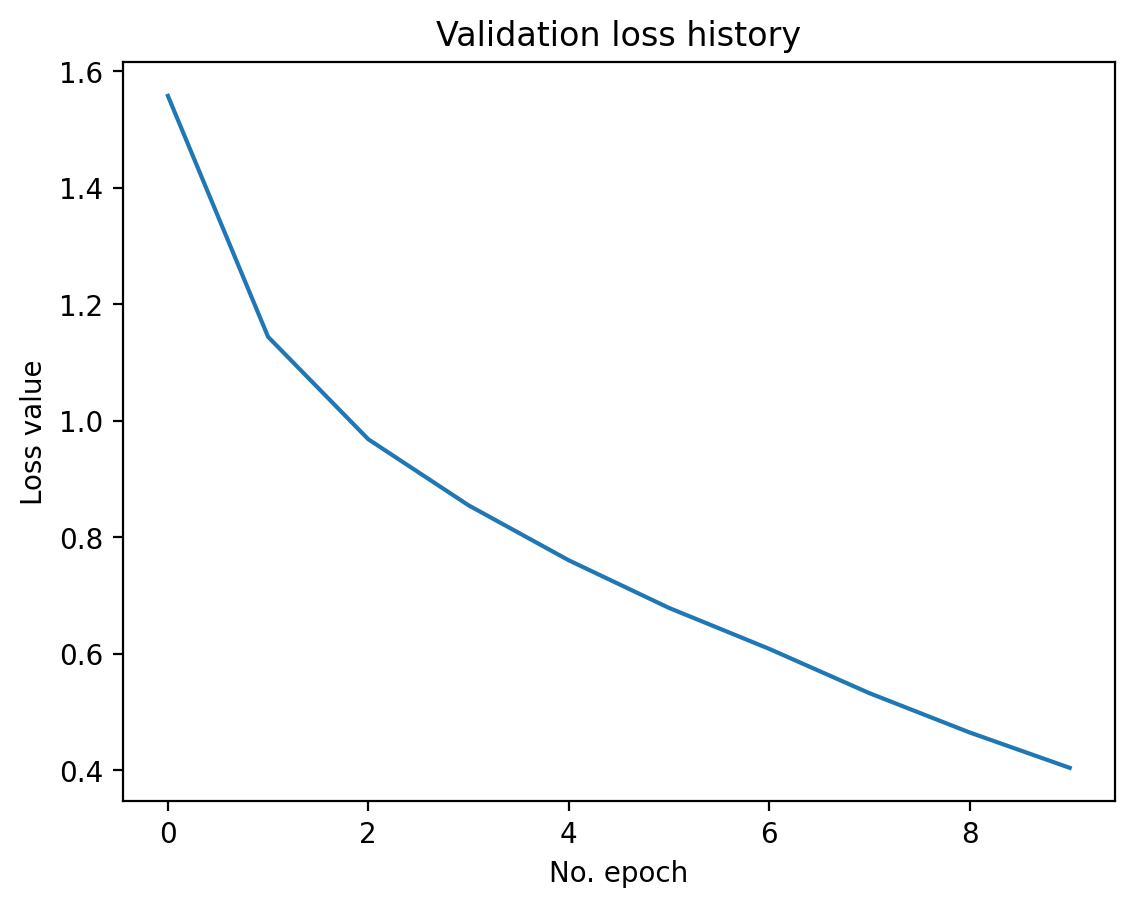

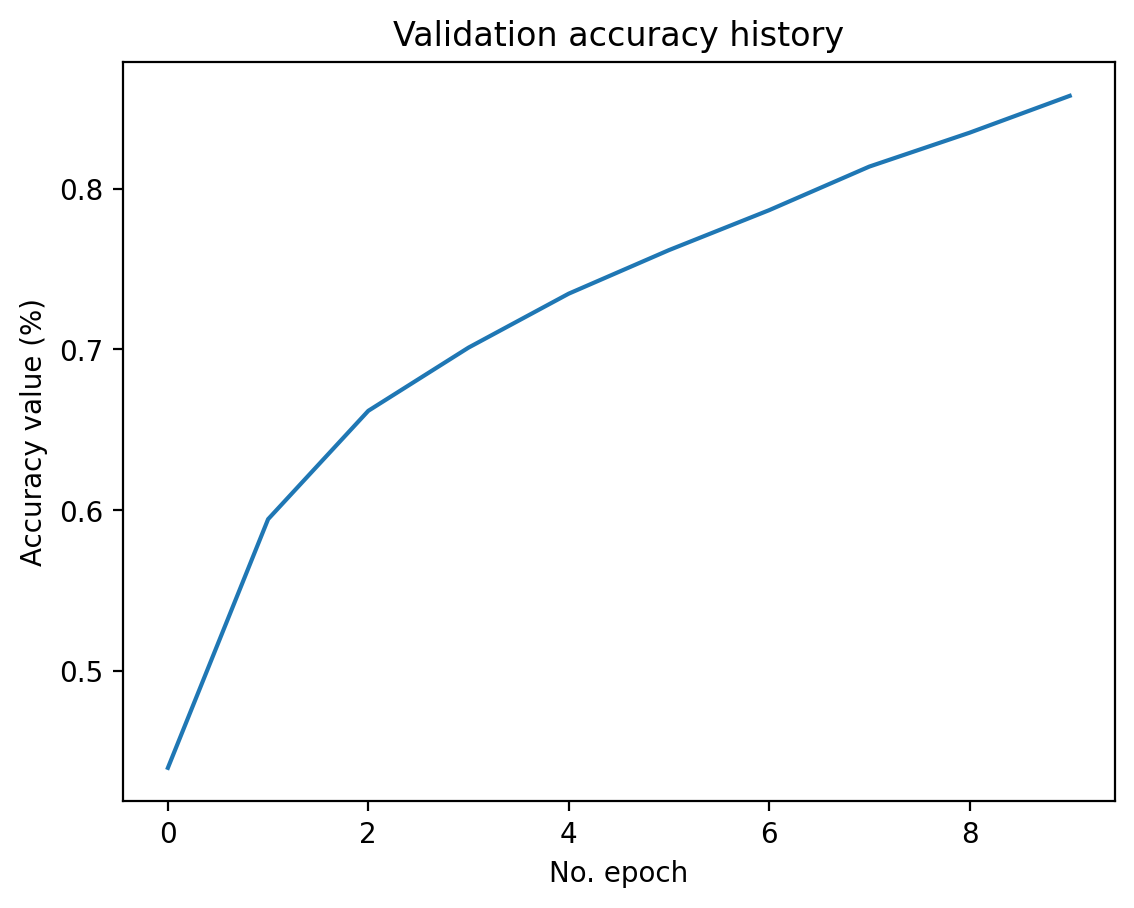

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 73s 73ms/step - accuracy: 0.3361 - loss: 1.8940
Epoch 2/10


KeyboardInterrupt: 

In [33]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 10   # you can increase it to 20,50,70, 100
optimizer = Adam()
verbosity = 1


# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')


# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))
model.summary()

# Compile the model
model.compile(loss=loss_function, optimizer=optimizer,metrics=['accuracy'])


# Fit data to model (this will take little time to train)
history = model.fit(input_train, target_train, batch_size=batch_size, epochs=no_epochs, verbose=verbosity)


# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

# By Adding k fold cross validation


from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 10
verbosity = 1
num_folds = 5

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs,  ):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  # Compile the model
  optimizer = Adam()  # Recreate the optimizer
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
                      batch_size=batch_size,
                      epochs=no_epochs,
                      verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

  # == Provide average scores ==
print('-----------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('-----------------------------------------------------------------------')

In [ ]:
# Practical 6 : Implementing regularization to avoid overfitting in binary classification.

(30, 2)
(30,)
(70, 2)
(70,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                     │ (None, 500)                 │           1,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4667 - loss: 0.7195 - val_accuracy: 0.5143 - val_loss: 0.6936
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.4667 - loss: 0.7020 - val_accuracy: 0.6571 - val_loss: 0.6822
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6000 - loss: 0.6850 - val_accuracy: 0.8000 - val_loss: 0.6713
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7333 - loss: 0.6686 - val_accuracy: 0.8286 - val_loss: 0.6608
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.8333 - loss: 0.6527 - val_accuracy: 0.8000 - val_loss: 0.6507
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9000 - loss: 0.6373 - val_accuracy: 0.7429 - val_loss: 0.6410
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9333 - loss: 0.6224 - val_accuracy: 0.7286 - val_loss: 0.6317
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9333 - loss: 0.6079 - val_accuracy: 0.7286 - val_loss:

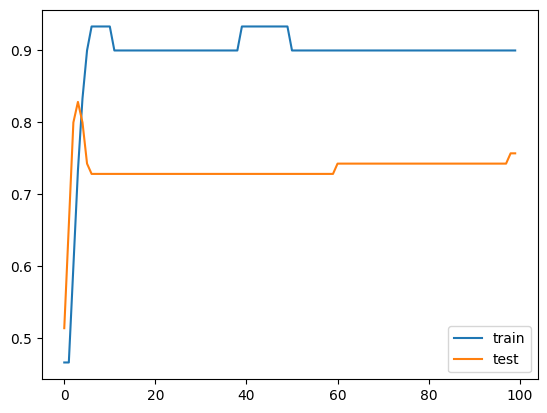

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_77 (Dense)                     │ (None, 500)                 │           1,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2333 - loss: 0.7311 - val_accuracy: 0.5143 - val_loss: 0.6975
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3000 - loss: 0.7141 - val_accuracy: 0.6571 - val_loss: 0.6865
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6000 - loss: 0.6974 - val_accuracy: 0.8143 - val_loss: 0.6758
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7333 - loss: 0.6812 - val_accuracy: 0.8286 - val_loss: 0.6655
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8000 - loss: 0.6655 - val_accuracy: 0.8286 - val_loss: 0.6555
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8667 - loss: 0.6502 - val_accuracy: 0.8143 - val_loss: 0.6459
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8667 - loss: 0.6353 - val_accuracy: 0.8000 - val_loss: 0.6366
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9000 - loss: 0.6208 - val_accuracy: 0.7429 - val_loss: 

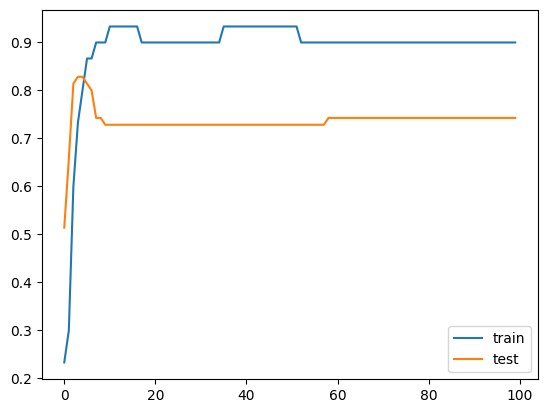

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_79 (Dense)                     │ (None, 500)                 │           1,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4667 - loss: 0.7472 - val_accuracy: 0.7143 - val_loss: 0.7377
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9000 - loss: 0.7307 - val_accuracy: 0.7143 - val_loss: 0.7272
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9000 - loss: 0.7148 - val_accuracy: 0.7143 - val_loss: 0.7172
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9000 - loss: 0.6993 - val_accuracy: 0.7143 - val_loss: 0.7076
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.8667 - loss: 0.6843 - val_accuracy: 0.7143 - val_loss: 0.6984
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8667 - loss: 0.6699 - val_accuracy: 0.7143 - val_loss: 0.6895
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8667 - loss: 0.6559 - val_accuracy: 0.7143 - val_loss: 0.6811
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8667 - loss: 0.6424 - val_accuracy: 0.7143 - val_loss

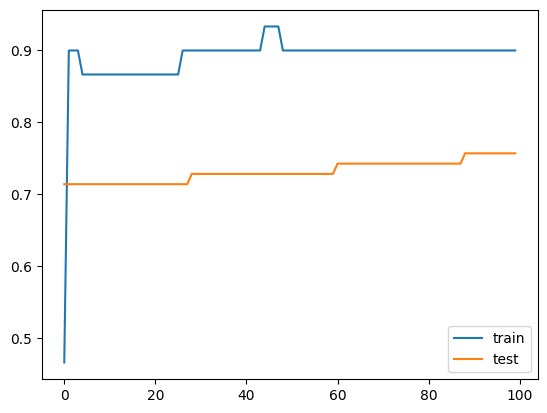

In [12]:
from matplotlib import pyplot
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense

X,Y=make_moons(n_samples=100,noise=0.2,random_state=1)
n_train=30
trainX,testX=X[:n_train,:],X[n_train:]
trainY,testY=Y[:n_train],Y[n_train:]

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100)
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()


from keras.regularizers import l2


model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(1,activation='sigmoid'))


model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100)

pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

from keras.regularizers import l1_l2


model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu',kernel_regularizer=l1_l2(l1=0.001,l2=0.001)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



model.summary()

history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100)

pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# Practical 7 : Demonstrate recurrent neural network that learns to perform sequence analysis.

In [29]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

for example, label in train_dataset.take(5):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

vocab = np.array(encoder.get_vocabulary())
vocab[:20]

encoded_example = encoder(example)[:3].numpy()
encoded_example

for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

print([layer.supports_masking for layer in model.layers])

# ##################################################################
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
sample_text_array = np.array([sample_text], dtype=object)
# Predict using the model
predictions = model.predict(sample_text_array)
print(predictions[0])

# predict on a sample text with padding

padding = "the " * 2000
encoded_sample_text = encoder([sample_text])[0]
encoded_padding = encoder([padding])[0]

# Concatenate the encoded sample text and padding
encoded_data = np.array([encoded_sample_text, encoded_padding])

# Predict using the model
predictions = model.predict(encoded_data)
print(predictions[0])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
sample_text_array = np.array([sample_text], dtype=object)
# Predict using the model
predictions = model.predict(sample_text_array)
print(predictions[0])

model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# predict on a sample text without padding.

sample_text = ('The movie was not good. The animation and the graphics '
               'were terrible. I would not recommend this movie.')
sample_text_array = np.array([sample_text], dtype=object)
# Predict using the model
predictions = model.predict(sample_text_array)
print(predictions[0])
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0
text:  b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. 

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_51_1/Cast:0", shape=(2, 2000), dtype=string). Expected shape (1,), but input has incompatible shape (2, 2000)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(2, 2000), dtype=int64)
  • training=False
  • mask=None

In [ ]:
# Practical 8 : Performing encoding and decoding of images using deep autoencoder.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.3823 - val_loss: 0.1895
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1804 - val_loss: 0.1524
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1481 - val_loss: 0.1333
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1315 - val_loss: 0.1212
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1206 - val_loss: 0.1128
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1124 - val_loss: 0.1070
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1070 - val_loss: 0.1026
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1029 - val_loss: 0.0994
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1000 - val_loss: 0.0970
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0977 - val_loss: 0.0956
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/ste

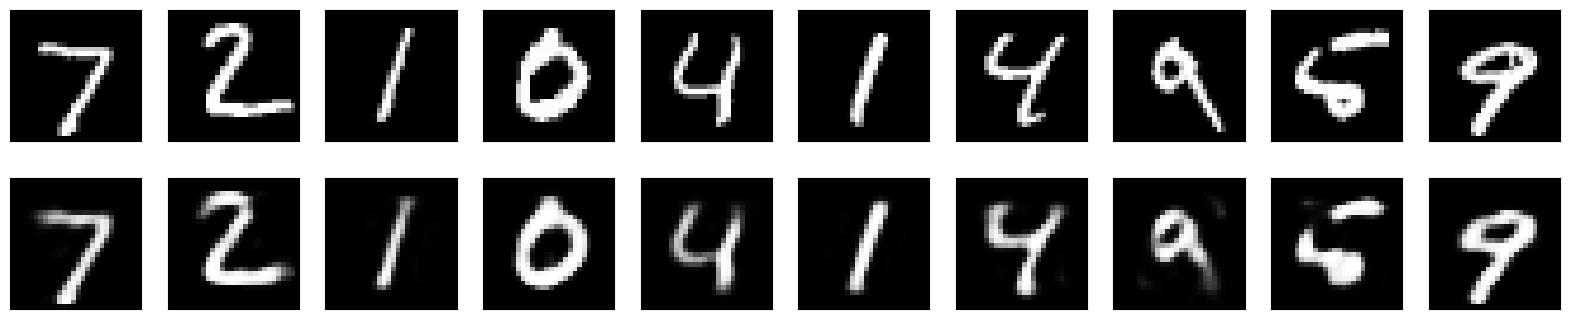

In [30]:
import keras
from keras import layers


# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


#Let's also create a separate encoder model:

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)


# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


#Now let's train our autoencoder to reconstruct MNIST digits.

#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


#Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

# Now let's train our autoencoder for 50 epochs:

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
# Type 2 for Practical 8
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)


#Let's also create a separate encoder model:

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)


# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

#Now let's train our autoencoder to reconstruct MNIST digits.

#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


#Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()


# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

# Now let's train our autoencoder for 50 epochs:

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)


autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
# Practical 9 Implementation of convolutional neural network to predict numbers from number images.

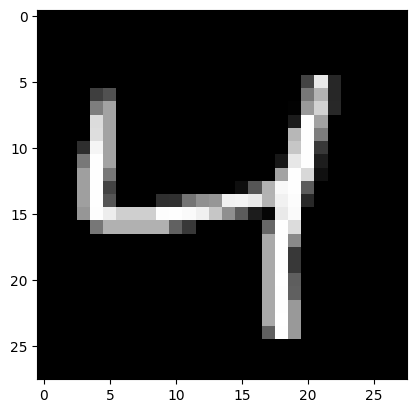

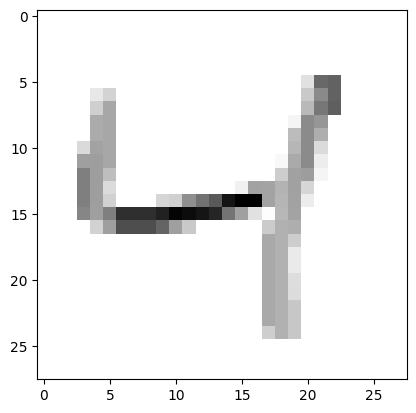

In [31]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape

y_train.shape

X_test.shape

y_test.shape

import matplotlib.pyplot as plt
plt.imshow(X_train[2])
plt.show()
plt.imshow(X_train[2], cmap=plt.cm.binary)

X_train[2]

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[2], cmap=plt.cm.binary)

In [ ]:
# Practical 10 : Denoising of images using autoencoder.

(60000, 784)
(10000, 784)
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.1855
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0997
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0933
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


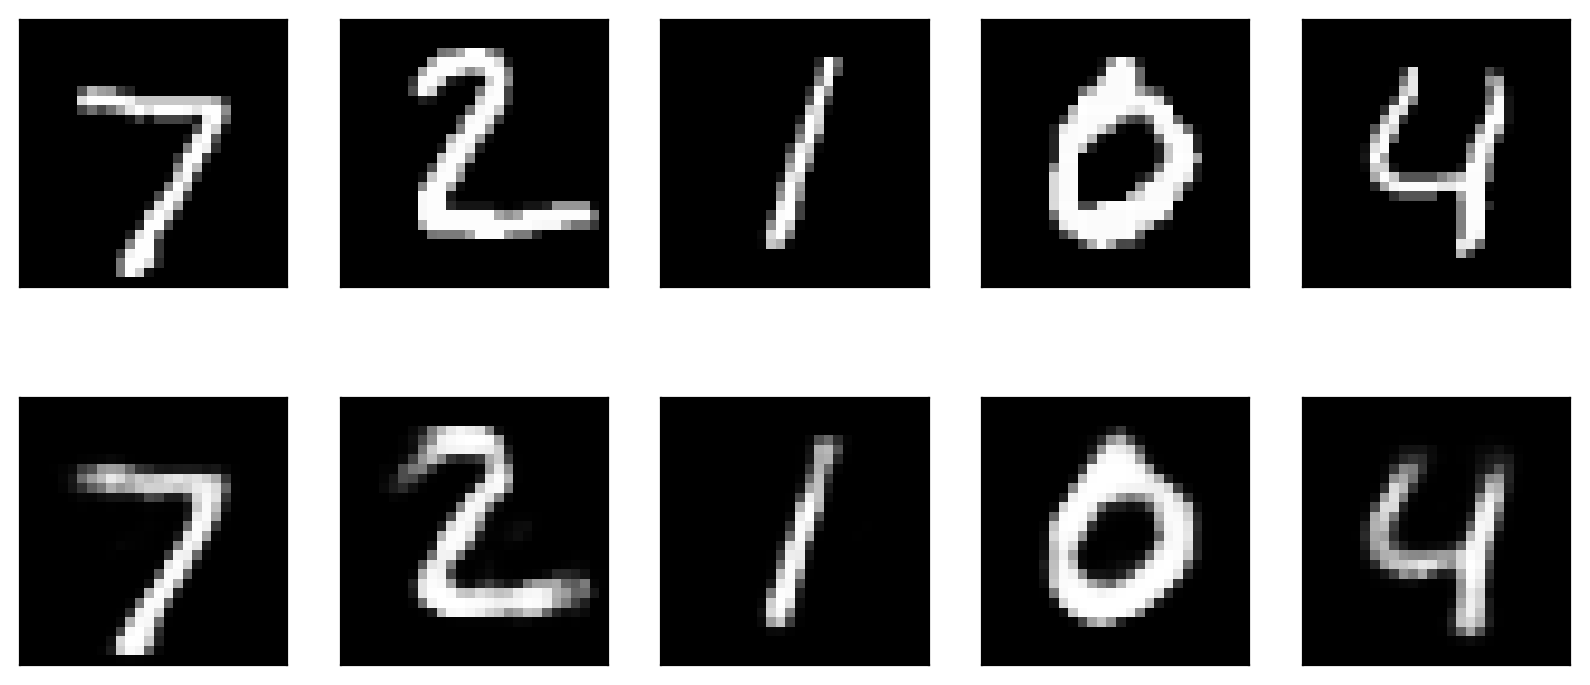

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2224
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1082
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0967
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0950
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0944
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


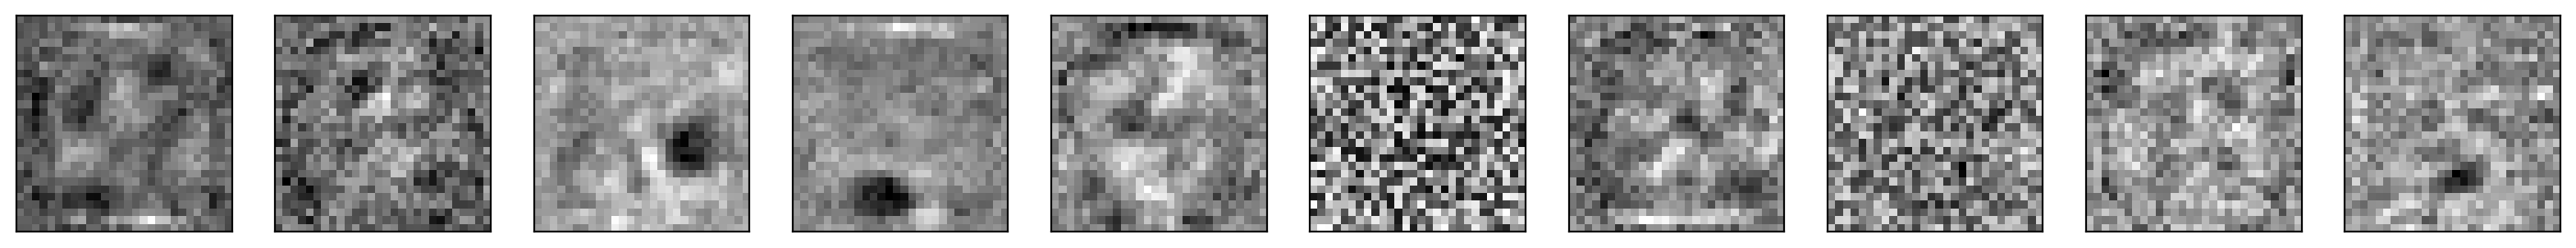

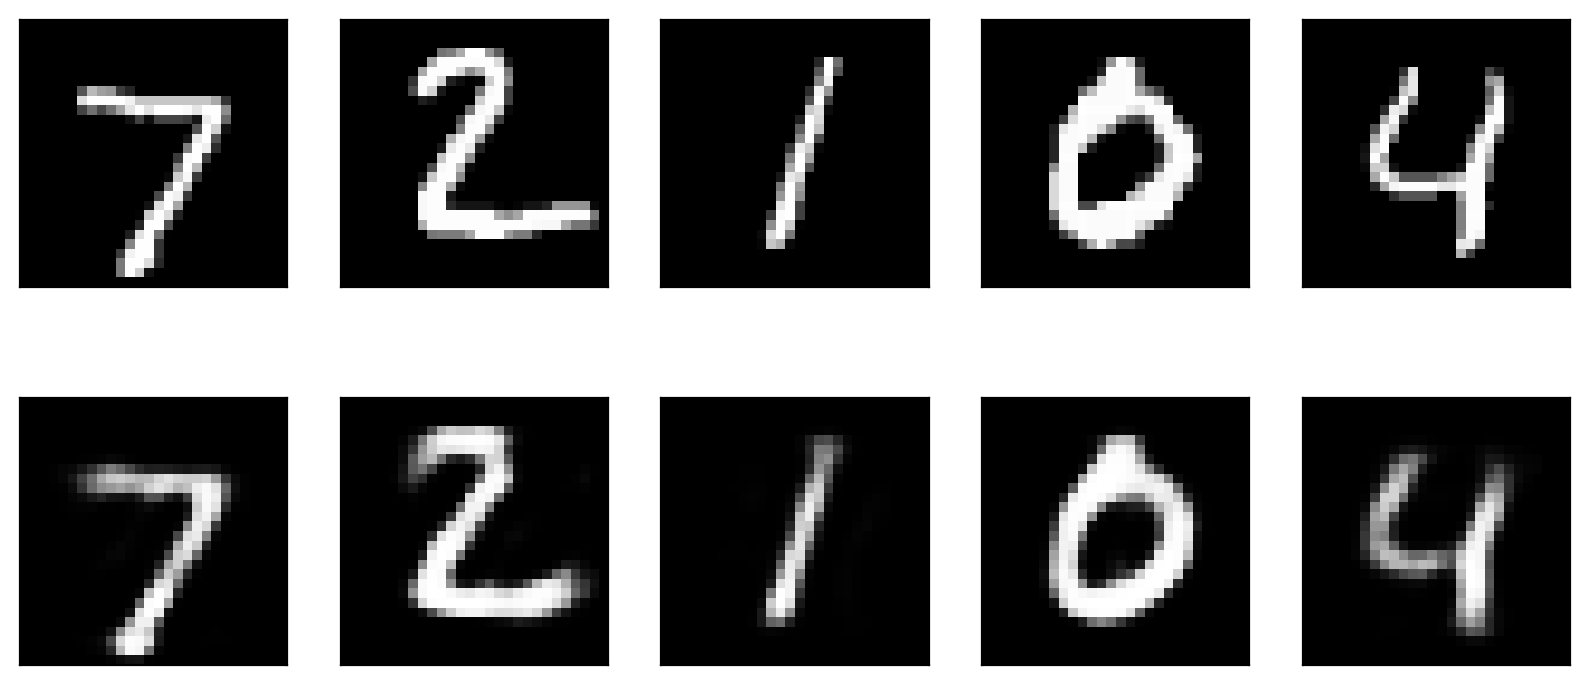

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.2118
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.1310
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.1217
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.1178
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.1149
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.1134
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.1123
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.1111
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.1099
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1094
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


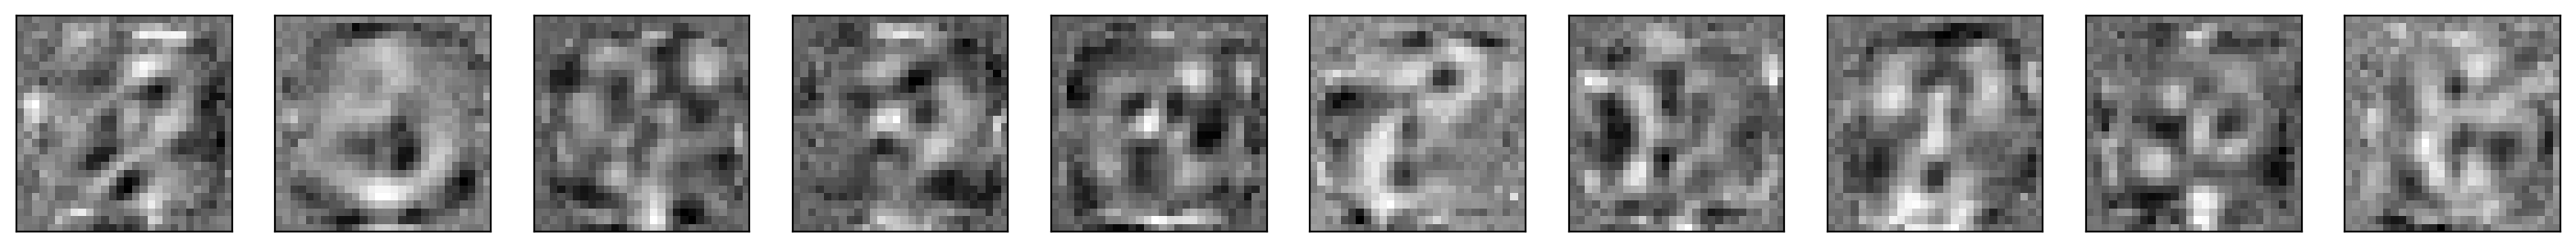

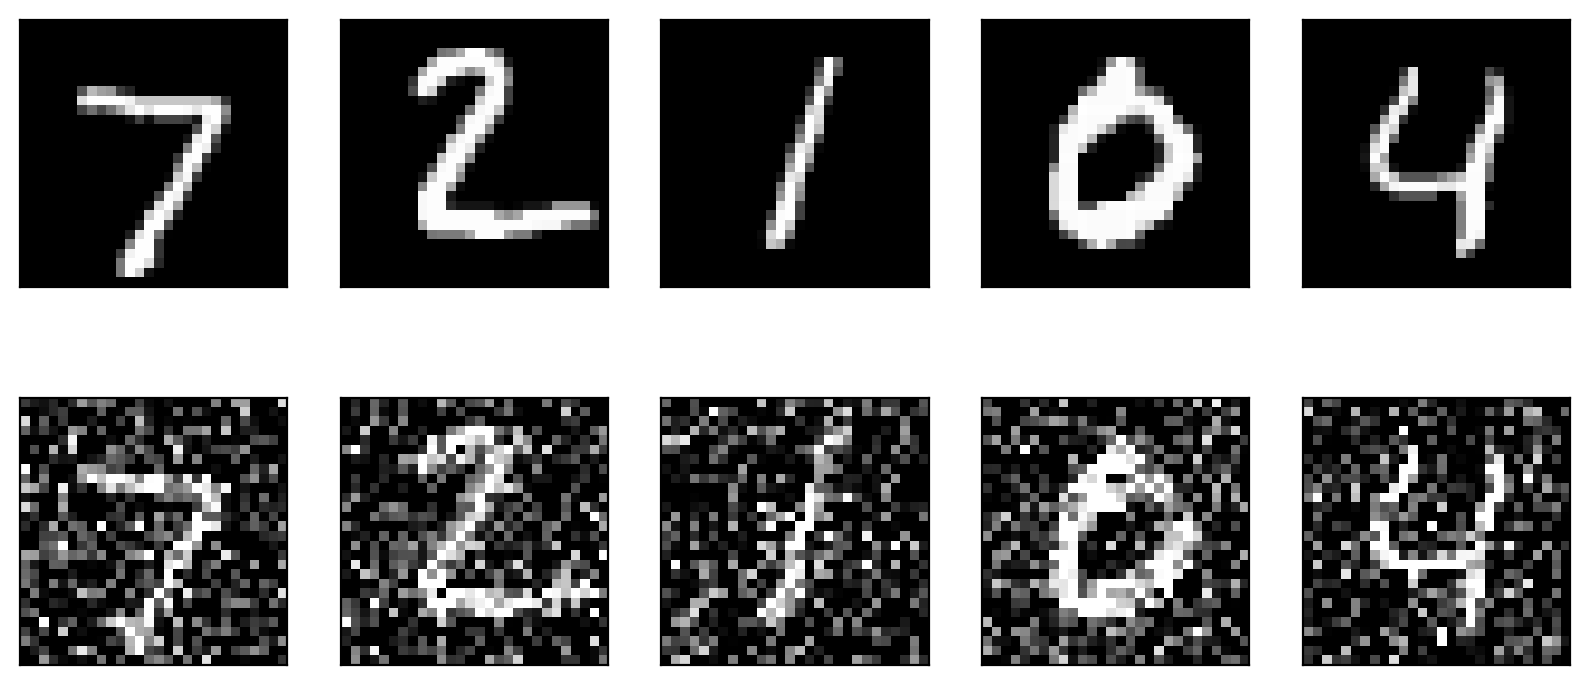

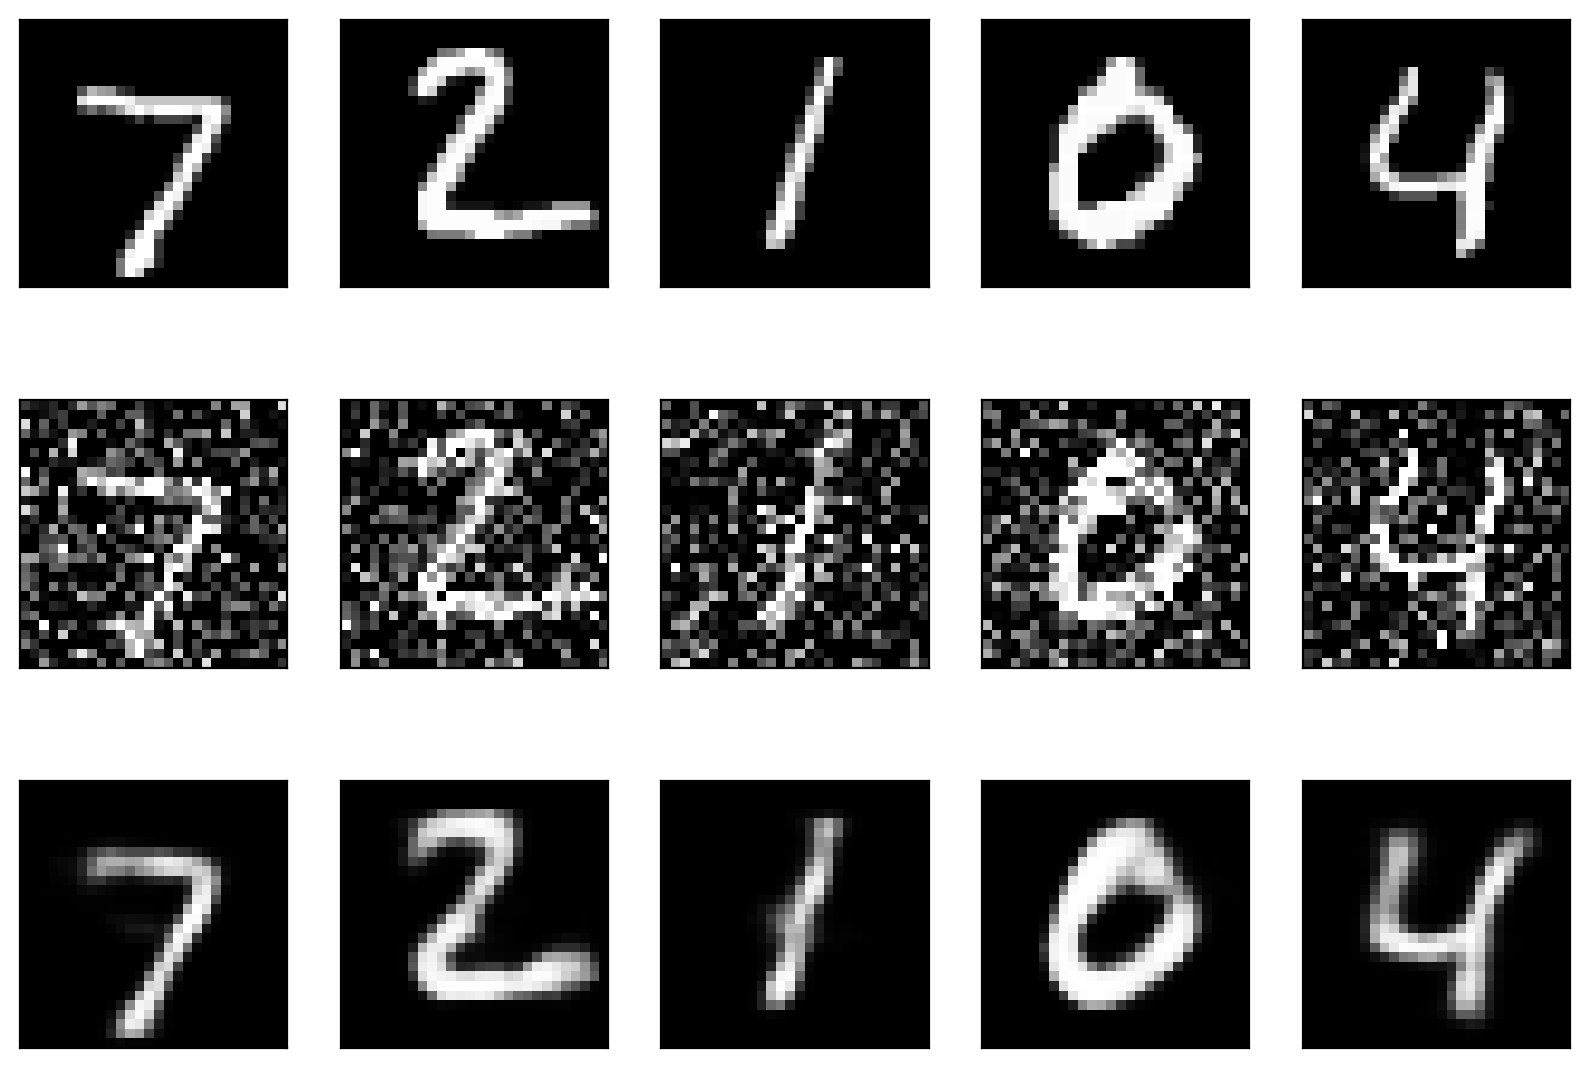

In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam

def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])

def plot_compare_histories(history_list, name_list, plot_accuracy=True):
    dflist = []
    min_epoch = len(history_list[0].epoch)
    losses = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h, index=history.epoch))
        min_epoch = min(min_epoch, len(history.epoch))
        losses.append(h['loss'][-1])

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx

    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Training Loss: " + ' vs '.join([str(round(x, 3)) for x in losses]))

    if plot_accuracy:
        ax = plt.subplot(212)
        historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epochs")

    plt.xlim(0, min_epoch-1)
    plt.tight_layout()

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=3)

plot_autoencoder_outputs(autoencoder, 5, (28, 28))

weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu')(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5)
plot_autoencoder_outputs(autoencoder, 5, (28, 28))

weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+20].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

n = 5
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

    # plot noisy image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')